####Trabalhando com planilhas do Excel

In [ ]:
#Importando a biblioteca
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#Ajustando todos os arquivos
df  = pd.concat([df1,df2,df3,df3,df4,df5])

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
8,Natal,2019-03-27,667.00,852,4
219,Natal,2019-01-02,19.67,1037,2
138,Recife,2019-03-02,150.38,983,6
77,Salvador,2019-01-01,218.76,1037,1
56,Fortaleza,2019-01-01,18.43,1002,1


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")  

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


####Tratando valores faltantes



In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(),inplace=True)


In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)  

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)  

####Criando colunas novas

In [ ]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0


In [ ]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        334455.04
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0



Trabalhando com datas

In [ ]:
#Transformando a coluna de dada em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#Verificando os tipos de dados de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#tranformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    189926.53
2019    323723.97
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
136,Natal,2019-01-02,13.81,1036,1,13.81,1.0,2019
19,Fortaleza,2019-01-01,18.86,1002,3,56.58,3.0,2019
106,Natal,2019-01-02,149.19,1035,2,298.38,2.0,2019
172,Salvador,2019-01-02,6.70,1035,1,6.70,1.0,2019
57,Natal,2019-02-24,425.00,854,4,1700.00,4.0,2019


In [ ]:
#Extraindo o Mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
48,Natal,2018-09-20,676.00,852,4,2704.00,4.0,2018,9,20
111,Salvador,2019-03-02,147.35,1037,2,294.70,2.0,2019,3,2
14,Fortaleza,2019-01-12,132.68,1005,1,132.68,1.0,2019,1,12
37,Aracaju,2018-01-01,152.74,1522,9,1374.66,9.0,2018,1,1
84,Salvador,2019-01-01,22.99,1036,1,22.99,1.0,2019,1,1


In [ ]:
#Retornando a data mais antiga
df.min()

Cidade                        Aracaju
Data              2018-01-01 00:00:00
Vendas                           3.01
LojaID                            852
Qtde                                1
Receita                          3.34
Receita/Vendas                    1.0
Ano_Venda                        2018
mes_venda                           1
dia_venda                           1
dtype: object

In [ ]:
#Calculando a diferença de dias
df["Diferença_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença_dias
135,Natal,2019-01-02,9.95,1037,3,29.85,3.0,2019,1,2,366 days
10,Salvador,2019-01-01,30.97,1036,1,30.97,1.0,2019,1,1,365 days
0,Recife,2019-01-01,162.61,981,1,162.61,1.0,2019,1,1,365 days
53,Natal,2019-02-14,290.00,854,4,1160.00,4.0,2019,2,14,409 days
183,Natal,2019-01-02,120.23,1037,2,240.46,2.0,2019,1,2,366 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença_dias,trimestre_vendas
46,Fortaleza,2019-01-01,6.45,1003,3,19.35,3.0,2019,1,1,365 days,1
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,6.0,2019,1,1,365 days,1
127,Aracaju,2018-01-01,33.12,1522,9,298.08,9.0,2018,1,1,0 days,1
93,Aracaju,2018-01-01,188.70,1523,1,188.70,1.0,2018,1,1,0 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1


In [ ]:
#Filtando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença_dias,trimestre_vendas
132,Fortaleza,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
120,Fortaleza,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
118,Fortaleza,2019-03-02,17.70,981,5,88.50,5.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
129,Fortaleza,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,4.0,2019,3,27,450 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1


####Visualizaçao de dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    166
1035    156
1037    142
1034     90
983      65
852      58
854      56
853      52
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
1004     28
1521     21
1003     20
Name: LojaID, dtype: int64

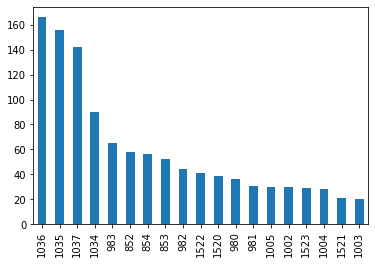

In [ ]:
#Gráficos de barras
df["LojaID"].value_counts(ascending=False).plot.bar()


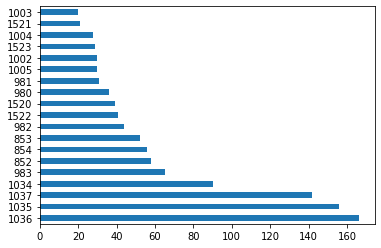

In [ ]:
#Gráficos de barras horizontais
df["LojaID"].value_counts().plot.barh()

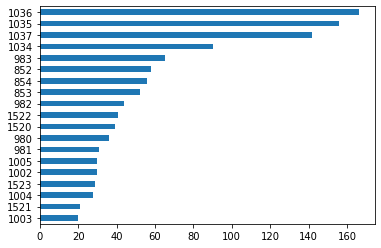

In [ ]:
#Gráficos de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();


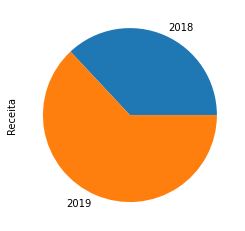

In [ ]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        480
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total vendas')

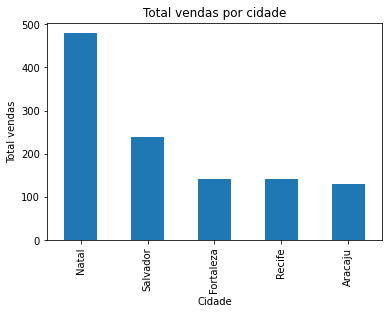

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")



Text(0, 0.5, 'Total vendas')

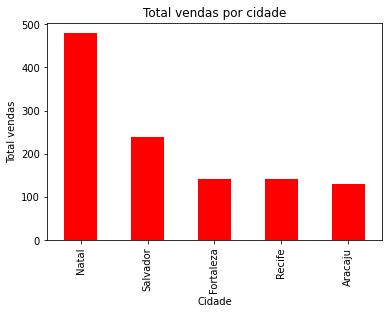

In [ ]:
#Alterando a cor
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

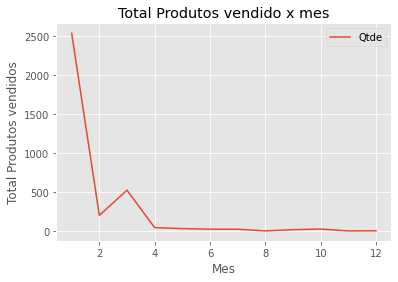

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendido x mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos vendidos")
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2541
2      203
3      527
4       46
5       34
6       26
7       26
8        4
9       20
10      28
11       4
12       6
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df [df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1859
2     171
3     513
4      24
Name: Qtde, dtype: int64

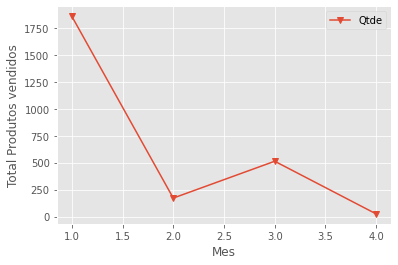

In [ ]:
#Total Produtos vendido por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mes")
plt.ylabel("Total Produtos vendidos")
plt.legend();

(array([252., 269., 297., 112.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

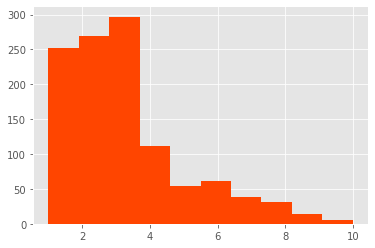

In [ ]:
#Gráfico de Histograma
plt.hist(df["Qtde"], color="orangered")

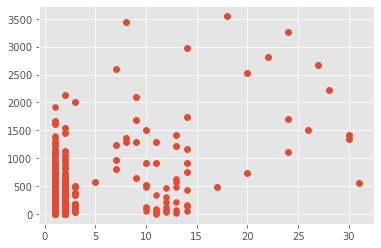

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

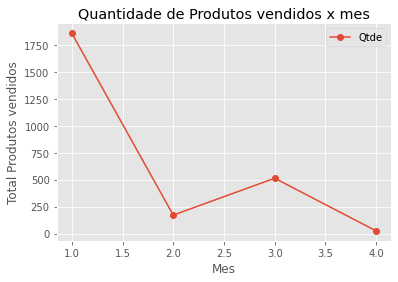

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de Produtos vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos vendidos")
plt.legend();
plt.savefig("Gráfico QTDE X MES.png")
